## Instructions
In order to better understand how our organization can finance the investments in the Video game  
industry we previously analyzed, we must first understand the state of our organization.  

You have been charged with analyzing the current state of our organization to determine what  
level of investment we can make in the game industry. To accomplish this you must do the following:  

1. How have video game sales performed in our organization as a whole?
    1. Show the profit for media and gaming for our entire company by month.
2. What do you feel is the direct cause for the performance of media and gaming?
3. After evaluating the media and gaming department in our company, what is your recommendation for investment in the video game industry?

  

### **TIPS:**

- If you need help don't wait until the last minute to reach out.
- You have access to examples of connecting to our database using Jupyter notebook. You will need to figure out the appropriate SQL queries to retrieve the information you need.
- You will likely need to dig in more than just figuring out whether media and gaming is profitable. That is not enough detail for this analysis. You will need to figure out the "why" media and gaming is/isn't profitable in order to appropriately evaluate a decision.


## Canvas submission
1. You must submit your Jupyter notebook file to canvas that demonstrates the analysis you performed on the company.
2. Submit a brief PowerPoint presentation that reflects the decisions you believe the organization should make based on the data you analyzed.

# Importing modules and connecting to database.

In [1]:
# Importing the appropriate libraries and database connection
from companyConnect2 import create_conn_params
import mysql.connector as mariadb
from sqlalchemy import create_engine, text
import pandas as pd
import matplotlib.pyplot as plt

params = create_conn_params()

# Create a connection to the MySQL database
engine = create_engine("mysql+mysqlconnector://{user}:{password}@{host}/{database}".format(**params))

# Option 1 - Using SQL and Pandas

## Determine total sales for Media and Gaming

In [2]:
# Choosing a SQL query to reduce the amount of data needed for the dataframe.

# Define the SQL query
sql_query = "SELECT YEAR(SalesDate) AS Year, MONTH(SalesDate) AS Month, SUM(Weekly_Sales) AS TotalSales FROM sales WHERE Dept = '55' GROUP BY YEAR(SalesDate), MONTH(SalesDate);"

sql = text(sql_query)

# Execute the SQL query and store the results in a Pandas DataFrame
sales_df = pd.read_sql_query(sql, engine)

# Remove any NaN values
sales_df = sales_df.dropna()

# Display all the values as INT
sales_df = sales_df.astype(int)

# Show results
sales_df.head(10)

,Year,Month,TotalSales
0,2019,2,3981645
1,2019,3,3312521
2,2019,4,3443900
3,2019,5,2422348
4,2019,6,2597272
5,2019,7,3052202
6,2019,8,2280959
7,2019,9,2276537
8,2019,10,2974144
9,2019,11,5440283


## Determine the total expenses for Media and Gaming

In [3]:
# Define the SQL query
sql_query = "SELECT YEAR(ExpenseDate) as Year, MONTH(ExpenseDate) as Month, SUM(AllocatedAmount) as TotalExpenses FROM expense_allocation WHERE Dept = '55' GROUP BY YEAR(ExpenseDate), MONTH(ExpenseDate);"

sql = text(sql_query)

# Execute the SQL query and store the results in a Pandas DataFrame
expenses_df = pd.read_sql_query(sql, engine)

# Remove any NaN values
expenses_df = expenses_df.dropna()

# Display all the values as INT
expenses_df = expenses_df.astype(int)

expenses_df.head()

,Year,Month,TotalExpenses
0,2019,2,16295911
1,2019,3,20811393
2,2019,4,20859050
3,2019,5,20902128
4,2019,6,20013404


## Merge the two data frames

In [4]:
# Merging dataframes examples from Session 8 presentation.
merged_df = pd.merge(sales_df, expenses_df, on=['Year', 'Month'])

merged_df.head()

,Year,Month,TotalSales,TotalExpenses
0,2019,2,3981645,16295911
1,2019,3,3312521,20811393
2,2019,4,3443900,20859050
3,2019,5,2422348,20902128
4,2019,6,2597272,20013404


## Subtract expenses from sales

In [5]:
# Merge the dataframes and calculate profit.
merged_df['Profit'] = merged_df['TotalSales'] - merged_df['TotalExpenses']

merged_df.head()

,Year,Month,TotalSales,TotalExpenses,Profit
0,2019,2,3981645,16295911,-12314266
1,2019,3,3312521,20811393,-17498872
2,2019,4,3443900,20859050,-17415150
3,2019,5,2422348,20902128,-18479780
4,2019,6,2597272,20013404,-17416132


## Create a line graph with the results

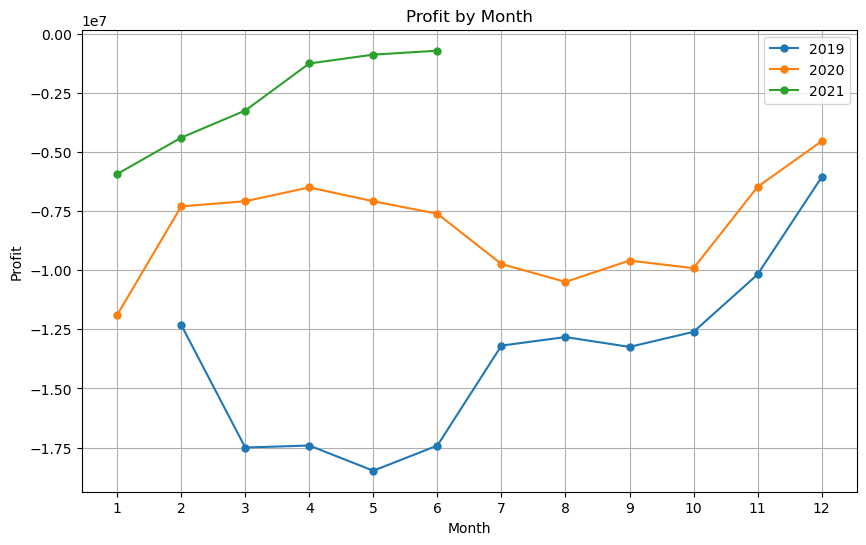

In [6]:
# Group merged_df by year
grouped_df = merged_df.groupby('Year')

# Set the figure size
plt.figure(figsize=(10,6))

# Loop through each year and plot a separate line
for year, group in grouped_df:plt.plot(group['Month'], group['Profit'], label=year, marker='.', markersize=10)

# Set the axis labels and title
plt.xlabel('Month')
plt.ylabel('Profit')
plt.title('Profit by Month')

# Set the tick marks on X-axis
months = merged_df['Month'].unique() # get all the unique months
plt.xticks(months)

# Add a legend
plt.legend()
plt.grid()

# Display the plot
plt.show()

# Option 2 - Using mostly Pandas

## Select sales data

In [7]:
# Define the SQL query
sql_query = "SELECT * FROM sales WHERE Dept = '55';"

sql = text(sql_query)

# Execute the SQL query and store the results in a Pandas DataFrame
sales_df = pd.read_sql_query(sql, engine)

# Remove any NaN values
sales_df = sales_df.dropna()


# Show results
sales_df.head(10)

,PK,Store,Dept,SalesDate,Weekly_Sales,IsHoliday
0,4670,1.0,55.0,2019-02-05,36485.0653,0
1,4671,1.0,55.0,2019-02-12,32438.9548,1
2,4672,1.0,55.0,2019-02-19,29883.5780,0
3,4673,1.0,55.0,2019-02-26,28687.8077,0
4,4674,1.0,55.0,2019-03-05,27678.1087,0
5,4675,1.0,55.0,2019-03-12,24742.0902,0
6,4676,1.0,55.0,2019-03-19,25052.5238,0
7,4677,1.0,55.0,2019-03-26,20323.9916,0
8,4678,1.0,55.0,2019-04-02,23068.5475,0
9,4679,1.0,55.0,2019-04-09,19204.7995,0


## Extract year and month from Sales, then group the data by Year and Month, summing Weekly_Sales

In [8]:
# Convert the 'SalesDate' column to datetime to ensure it is datetime data.
sales_df['SalesDate'] = pd.to_datetime(sales_df['SalesDate'])

# Extract the year and month into separate columns
sales_df['year'] = sales_df['SalesDate'].dt.year
sales_df['month'] = sales_df['SalesDate'].dt.month

# Group by year and month, and sum the sales
sales_result = sales_df.groupby(['year', 'month'])['Weekly_Sales'].sum().reset_index()

# Ensure 'Weekly_Sales' has two decimal places as a float
sales_result['Weekly_Sales'] = sales_result['Weekly_Sales'].round(2)

print(sales_result)

    year  month  Weekly_Sales
0   2019      2    3981645.25
1   2019      3    3312521.48
2   2019      4    3443900.76
3   2019      5    2422348.82
4   2019      6    2597272.14
5   2019      7    3052202.36
6   2019      8    2280959.77
7   2019      9    2276537.94
8   2019     10    2974144.17
9   2019     11    5440283.51
10  2019     12    9601961.32
11  2020      1    2360557.59
12  2020      2    3113559.88
13  2020      3    2856570.98
14  2020      4    3198303.44
15  2020      5    2025283.96
16  2020      6    2143700.15
17  2020      7    2529801.59
18  2020      8    1785907.72
19  2020      9    2707064.25
20  2020     10    2408672.40
21  2020     11    5884867.50
22  2020     12    8151055.29
23  2021      1    6722087.17
24  2021      2    6676936.75
25  2021      3    8097116.79
26  2021      4     914929.67
27  2021      5     907603.56
28  2021      6    1161671.35


## Extract expenses for Media and Gaming

In [9]:
# Define the SQL query
sql_query = "SELECT * FROM expense_allocation WHERE Dept = '55';"

sql = text(sql_query)

# Execute the SQL query and store the results in a Pandas DataFrame
expenses_df = pd.read_sql_query(sql, engine)

# Remove any NaN values
expenses_df = expenses_df.dropna()


expenses_df.head()

,Store,Dept,GLAccount,ExpenseDate,AllocatedAmount
0,1.0,55.0,923655.0,2019-02-01,21607.9902
1,1.0,55.0,923655.0,2019-03-01,97917.5800
2,1.0,55.0,923655.0,2019-04-01,98113.4152
3,1.0,55.0,923655.0,2019-05-01,98309.6420
4,1.0,55.0,923655.0,2019-06-01,98506.2613


## Group expenses by Year and Month

In [10]:
# Convert the 'SalesDate' column to datetime to ensure it is datetime data.
expenses_df['ExpenseDate'] = pd.to_datetime(expenses_df['ExpenseDate'])

# Extract the year and month into separate columns
expenses_df['year'] = expenses_df['ExpenseDate'].dt.year
expenses_df['month'] = expenses_df['ExpenseDate'].dt.month

# Group by year and month, and sum the sales
expenses_result = expenses_df.groupby(['year', 'month'])['AllocatedAmount'].sum().reset_index()

# Ensure 'AllocatedAmount' has two decimal places as a float
expenses_result['AllocatedAmount'] = expenses_result['AllocatedAmount'].round(2)

print(expenses_result)

    year  month  AllocatedAmount
0   2019      2      16295911.34
1   2019      3      20811393.35
2   2019      4      20859050.62
3   2019      5      20902128.31
4   2019      6      20013404.23
5   2019      7      16244118.01
6   2019      8      15110532.30
7   2019      9      15522406.60
8   2019     10      15583526.02
9   2019     11      15622662.84
10  2019     12      15671640.69
11  2020      1      14258563.27
12  2020      2      10421646.24
13  2020      3       9943139.27
14  2020      4       9703977.80
15  2020      5       9114322.16
16  2020      6       9762001.68
17  2020      7      12272455.63
18  2020      8      12283949.27
19  2020      9      12303850.85
20  2020     10      12327488.31
21  2020     11      12363415.54
22  2020     12      12701141.10
23  2021      1      12661233.11
24  2021      2      11078377.13
25  2021      3      11352020.38
26  2021      4       2180875.70
27  2021      5       1798974.67
28  2021      6       1887978.31


## Merge the two data frames

In [11]:
# Merging dataframes examples from Session 8 presentation.
merged_df = pd.merge(sales_result, expenses_result, on=['year', 'month'])

merged_df.head()

,year,month,Weekly_Sales,AllocatedAmount
0,2019,2,3981645.25,16295911.34
1,2019,3,3312521.48,20811393.35
2,2019,4,3443900.76,20859050.62
3,2019,5,2422348.82,20902128.31
4,2019,6,2597272.14,20013404.23


## Subtract expenses from sales

In [12]:
# Calculate profit
merged_df['Profit'] = merged_df['Weekly_Sales'] - merged_df['AllocatedAmount']

# Display the new dataframe with the 'Profit' column
print(merged_df)

    year  month  Weekly_Sales  AllocatedAmount       Profit
0   2019      2    3981645.25      16295911.34 -12314266.09
1   2019      3    3312521.48      20811393.35 -17498871.87
2   2019      4    3443900.76      20859050.62 -17415149.86
3   2019      5    2422348.82      20902128.31 -18479779.49
4   2019      6    2597272.14      20013404.23 -17416132.09
5   2019      7    3052202.36      16244118.01 -13191915.65
6   2019      8    2280959.77      15110532.30 -12829572.53
7   2019      9    2276537.94      15522406.60 -13245868.66
8   2019     10    2974144.17      15583526.02 -12609381.85
9   2019     11    5440283.51      15622662.84 -10182379.33
10  2019     12    9601961.32      15671640.69  -6069679.37
11  2020      1    2360557.59      14258563.27 -11898005.68
12  2020      2    3113559.88      10421646.24  -7308086.36
13  2020      3    2856570.98       9943139.27  -7086568.29
14  2020      4    3198303.44       9703977.80  -6505674.36
15  2020      5    2025283.96       9114

## Graph the results

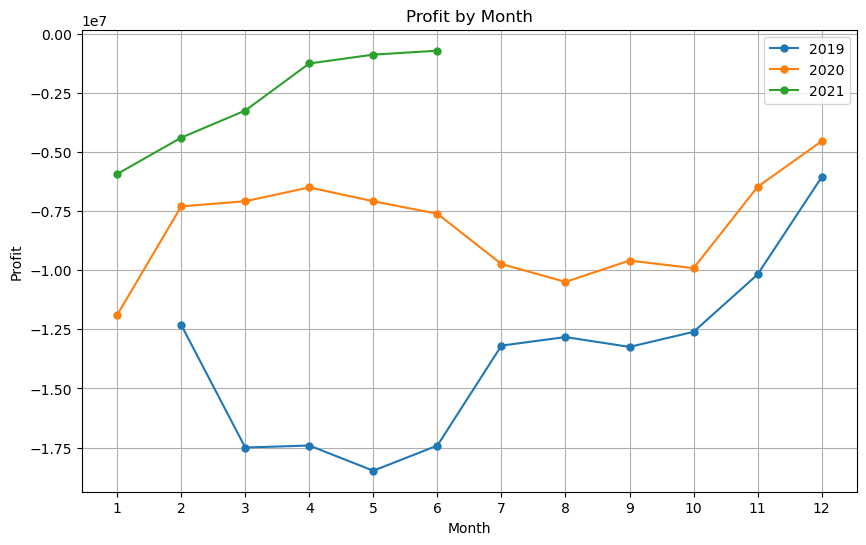

In [13]:
# Group merged_df by year
grouped_df = merged_df.groupby('year')

# Set the figure size
plt.figure(figsize=(10,6))

# Loop through each year and plot a separate line
for year, group in grouped_df:plt.plot(group['month'], group['Profit'], label=year, marker='.', markersize=10)

# Set the axis labels and title
plt.xlabel('Month')
plt.ylabel('Profit')
plt.title('Profit by Month')

# Set the tick marks on X-axis
months = merged_df['month'].unique() # get all the unique months
plt.xticks(months)

# Add a legend
plt.legend()
plt.grid()

# Display the plot
plt.show()